In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gaussian(x, mean=0, std=1):
    """Computes the gaussian function at point x, with given mean and standard deviation"""
    return np.exp(-np.square(x-mean)/(2*np.square(std)))/np.sqrt(2*np.pi*np.square(std))

def plot_size(size):
    """Sets the current plot size to the chosen value"""
    plt.rcParams['figure.figsize'] = size

In [3]:
class Particle:
    """
    This class contains informations about a single particle. 
    """
    
    def __init__(self, rad, r, v):
        """
        Creates the Particle object.
        
        Args:
            rad: float, radius of the particle
            r: array or list, initial position vector
            v: array or list, initial velocity vector
        """
        
        self.rad = rad
        self.r = np.array(r)
        self.v = np.array(v)
        
        self.x, self.y = self.r
        self.v_x, self.v_y = self.v
        
    def __str__(self):
        return "Particle(rad=%.2f, r=%s, v=%s)" % (self.rad, self.r, self.v)
    
    def __repr__(self):
        return "Particle(rad=%.2f, r=%s, v=%s)" % (self.rad, self.r, self.v)

In [4]:
mean = 100
std = 15
data = np.random.normal(loc=mean, scale=std, size=(20000,))

mean_hat, std_hat = data.mean(), data.std()

print("Estimated mean: %.5f. \nEstimated std: %.5f" % (mean_hat, std_hat))

Estimated mean: 99.89616. 
Estimated std: 15.10024


In [5]:
# Estimate the gaussian distribution using the CLT
unidata = np.random.uniform(-1, 1, (20000, 10))
data_clt = 100 + 15*unidata.sum(1)*np.sqrt(3./10)

In [6]:
plot_size((10, 8.5))

plt.subplot(211)
n, bins, patches = plt.hist(data, 100, normed=True, label="Sampled distribution")

X = np.linspace(bins[0], bins[-1], 1000)
Y = gaussian(X, 100, 15)
plt.plot(X, Y, linewidth=5, label="Theoretical distribution")

plt.title("Sampling the gaussian distribution with mean %.0f and std %.0f" % (mean, std))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(50, 150)
plt.legend()

plt.subplot(212)
plt.hist(data_clt, 100, normed=True, label="Uniform estimate")
plt.plot(X, Y, linewidth=5, label="Theoretical distribution")

plt.title("Estimating the gaussian distribution with uniform sampling")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(50, 150)
plt.legend()
plt.show()

In [7]:
def check_collision(p1, p2):
    """
    Checks whether or not two particles collide, 
    or, in other words, if the distance between their centers is lower than the sum of their radii.
    
    Args:
        p1, p2: Particle, particles to check collision for
        
    Returns:
        collision: boolean
    """
    
    rad_sum = p1.rad + p2.rad
    dist = np.sqrt(np.sum(np.square(p1.r - p2.r)))
    collision = dist < rad_sum
    return collision

def any_collisions(p1, particles):
    """
    Checks whether or not the particle collides with any of the particles in the list.
    
    Args:
        p1: Particle, particle to check collision
        particles: list of Particle objects, list of already existing particles
        
    Returns:
        collision: boolean
    """
    collision = False
    
    for p2 in particles:
        if check_collision(p1, p2):
            collision = True
            return collision
        
    return collision
    
   

In [8]:
def generate_particles(n, collision=True, size=.05, max_try=1000):
    """
    Generates n particles with random position in [0,1] x [0,1] box.
    
    Args:
        n: int, number of particles to generate
        collision: boolean, whether to allow collisions between particles
        size: float, size of the particles
        max_try: int, maximum number of attempts to generate the particles
        
    Returns:
        particles: list of Particle
    """
    
    if collision:
        max_try = n
        
    particles = []
    for _ in range(max_try):
        pos = np.random.rand(2)
        vel = np.random.rand(2)
        particle = Particle(rad=size, r=pos, v=vel)
        if not collision:
            collides = any_collisions(particle, particles)
            if not collides:
                particles.append(particle)
            
            if len(particles) == n:
                break
        else:
            particles.append(particle)
            
    assert len(particles) == n
    
    return particles
        
    

In [9]:
RADIUS = .05

plot_size((3, 3))
fig, ax = plt.subplots()

particles = generate_particles(16, collision=False, size=.05)

for particle in particles:
    color = plt.cm.summer(np.square(particle.v).sum())
    circle = plt.Circle(xy=particle.r, radius=particle.rad, color=color)
    ax.add_artist(circle)


In [12]:
def plot_particles(particles):
    RADIUS = .05

    plot_size((3, 3))
    fig, ax = plt.subplots()
    
    for particle in particles:
        color = plt.cm.summer(np.square(particle.v).sum())
        circle = plt.Circle(xy=particle.r, radius=particle.rad, color=color)
        ax.add_artist(circle)
    
    return ax

In [21]:
def time_step(particles):
    for particle in particles:
        particle.r += 0.1*particle.v
    return particles

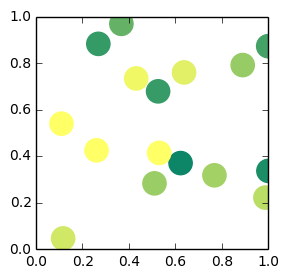

In [36]:
particles = generate_particles(16, False)
plot_particles(particles)

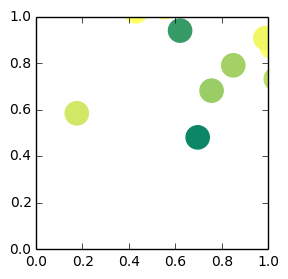

In [42]:
particles = time_step(particles)
plot_particles(particles)